In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("imported libraries . . . ")

In [2]:
#Read the data
train = pd.read_csv("/home/smita/MP/train.csv", parse_dates=['date_time', 'srch_ci', 'srch_co'])


In [3]:
# Get day_of_week, year, month and day_of_month
train['day_of_week'] =  train.date_time.dt.weekday
train['year'] =  train.date_time.dt.year
train['month'] =  train.date_time.dt.month
train['day_of_month'] =  train.date_time.dt.day


In [4]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,day_of_week,year,month,day_of_month
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,3,2,50,628,1,0,2014,8,11
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,1,2,50,628,1,0,2014,8,11
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,2,50,628,1,0,2014,8,11
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,2,50,1457,80,5,2014,8,9
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,2,50,1457,21,5,2014,8,9


In [5]:
# Select the necessary columns to see booking trend by year and month
train1  = train[['hotel_cluster', 'is_booking', 'year', 'month']]

In [6]:
# Group the data by year , month, hotel_cluster to get the booking and click incidents 
agg = train1.groupby(['year','month','hotel_cluster']).agg(['sum', 'count'])
agg.columns = ('bookings', 'clicks')

In [7]:
agg.head()

bookings  clicks
year month hotel_cluster                  
2013 1     0                   531    8657
           1                  1515   11798
           2                  1160    9578
           3                   435    6753
           4                   736    6117

### Booking Trends by year

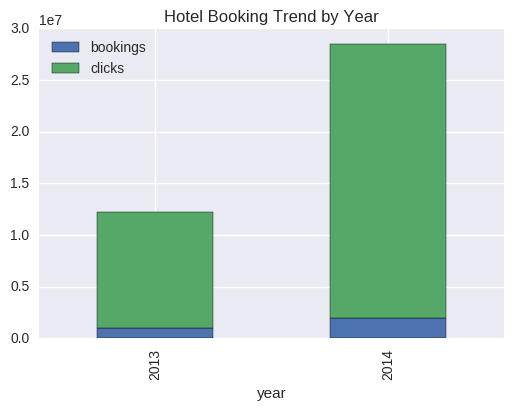

In [8]:
# Group the data by year to explore the hotel search and booking activities
agg1_year = agg.groupby(level=0).agg(['sum'] )
agg1_year.columns = ('bookings', 'clicks')
agg1_year.plot( kind = 'bar', stacked = True, title='Hotel Booking Trend by Year' )

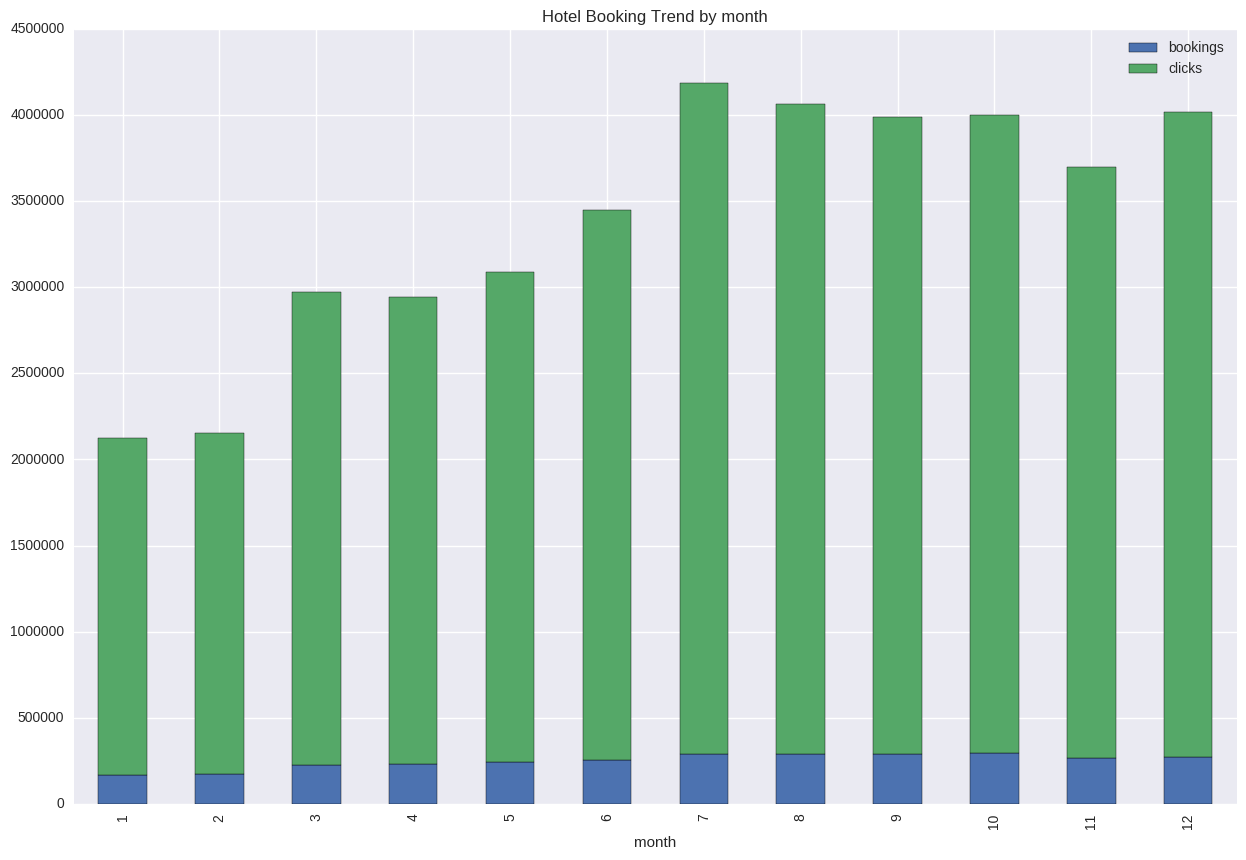

In [12]:
# How hotel booking and search activities affected by months
agg1_month = agg.groupby(level=1).agg(['sum'] )
agg1_month.columns = ('bookings', 'clicks')
agg1_month.plot( kind = 'bar', stacked = True, title='Hotel Booking Trend by month' , figsize=(15, 10))

### How the hotel_cluster type affect booking and click events

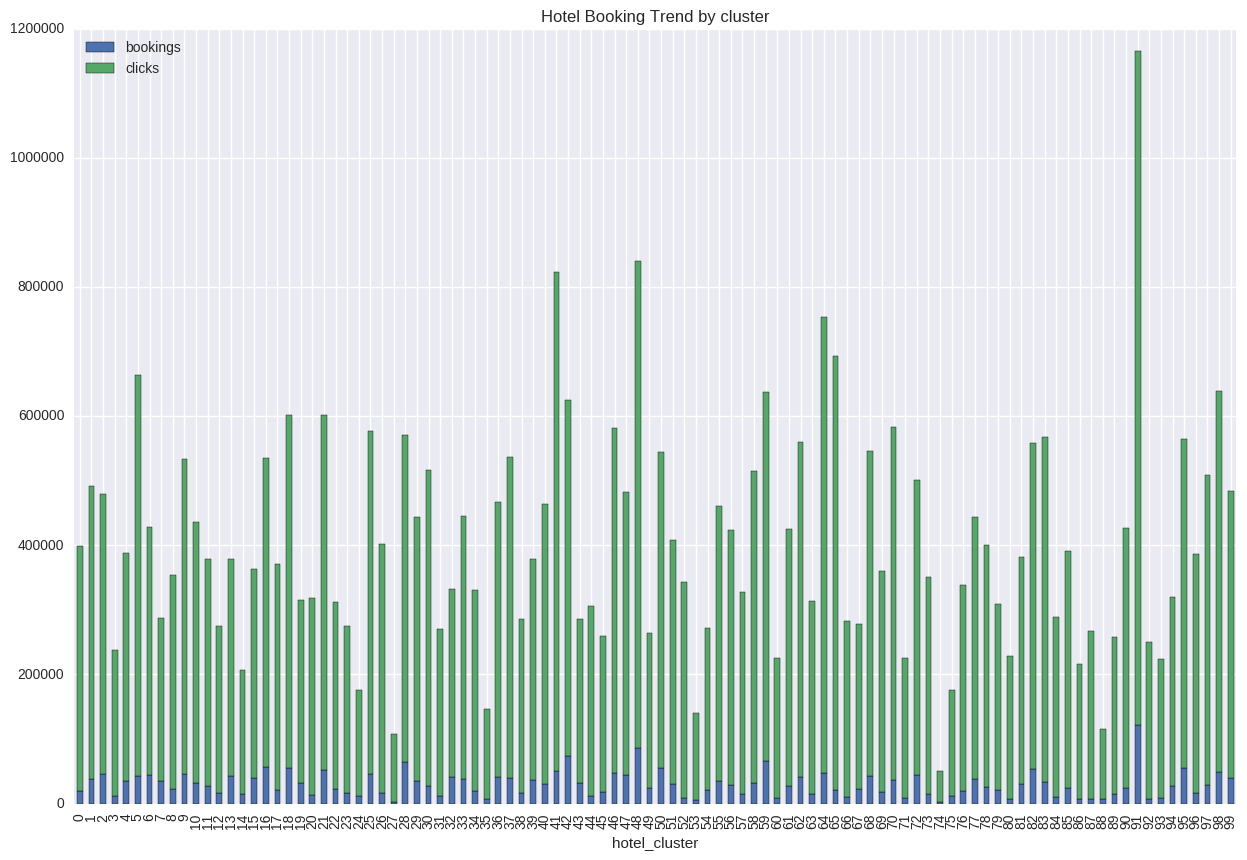

In [14]:
# Booking Trends by Hotel_Cluster
agg1_cluster = agg.groupby(level=2).agg(['sum'] )
agg1_cluster.columns = ('bookings', 'clicks')
agg1_cluster.plot( kind = 'bar', stacked = True, title='Hotel Booking Trend by cluster', figsize=(15, 10) )

### Booking Trends by Hotel Continent


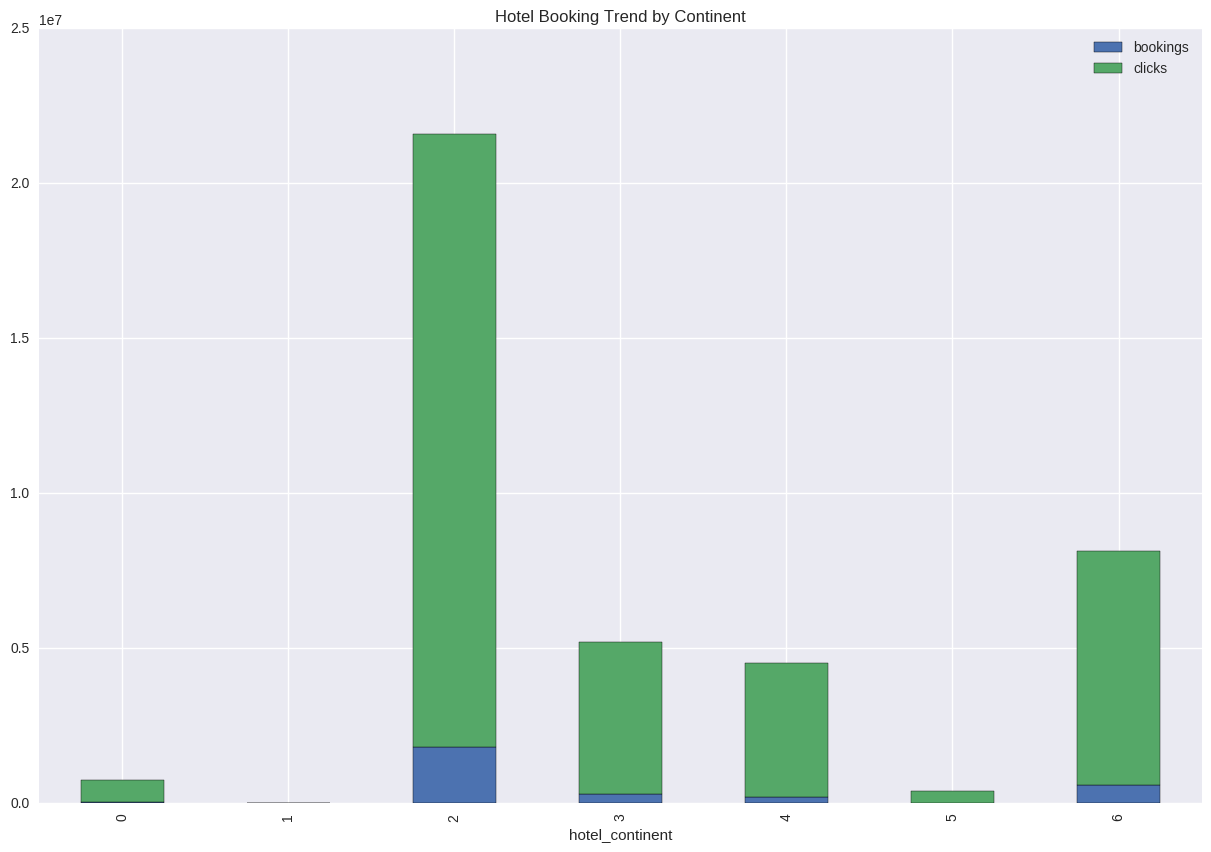

In [18]:
# What's the most popular hotel_continent??

train1  = train[['hotel_continent', 'is_booking']]
agg1_continent = train1.groupby('hotel_continent').agg(['sum', 'count'] )
agg1_continent.columns = ('bookings', 'clicks')
agg1_continent.plot( kind = 'bar', stacked = True, title='Hotel Booking Trend by Continent' , figsize=(15, 10))

In [21]:
train1 =  train[['user_location_country','hotel_cluster']]

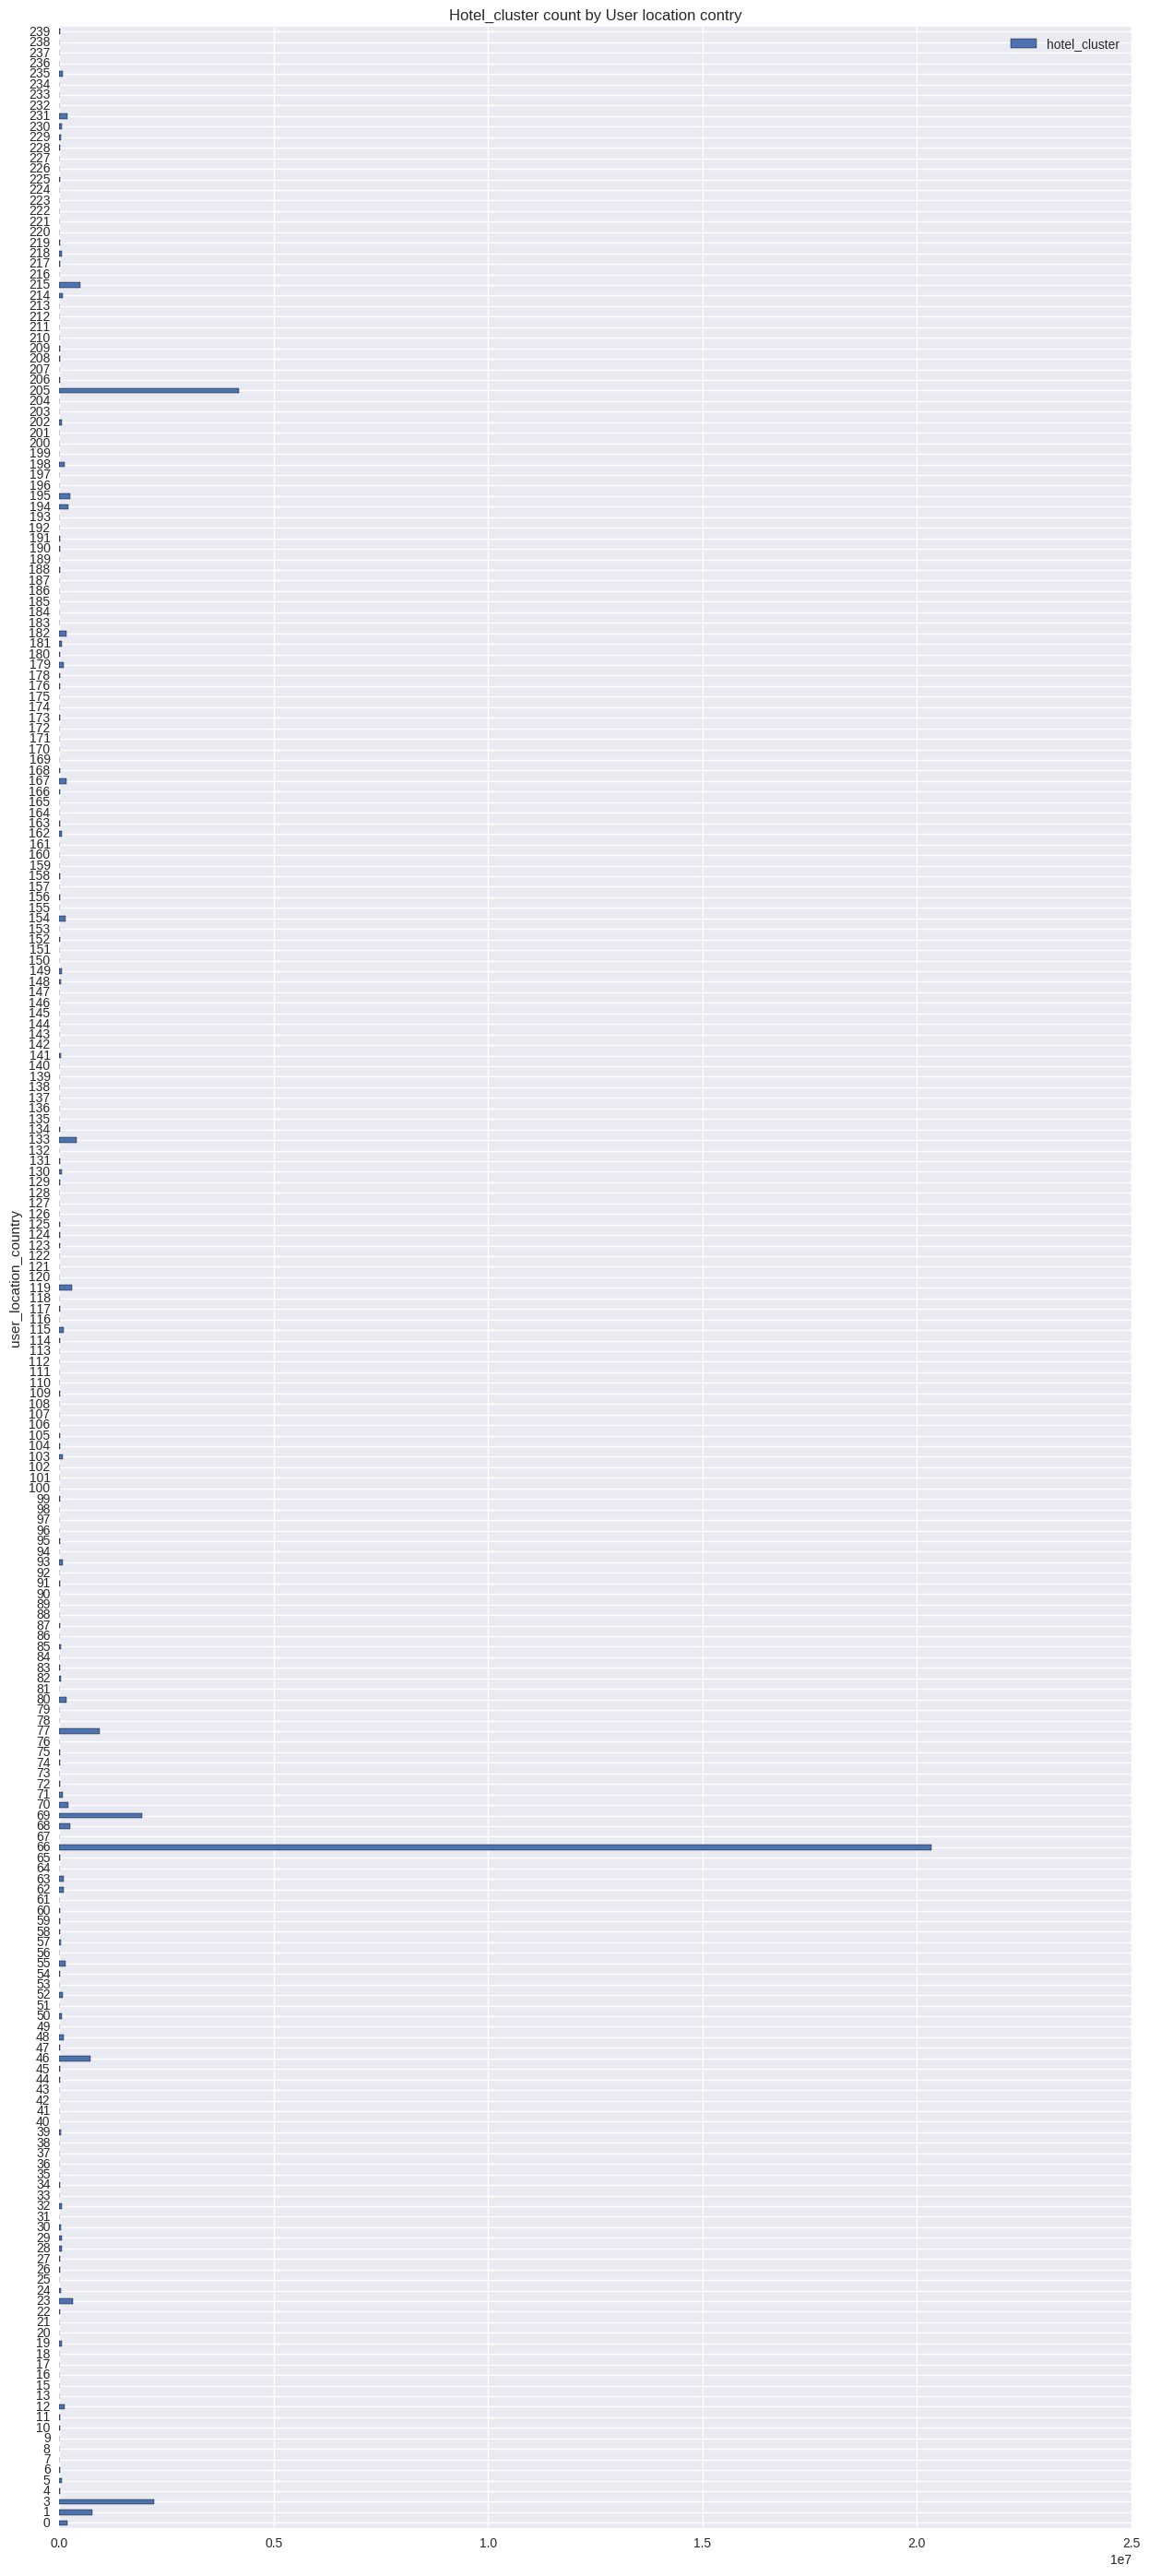

In [27]:
# Hotel_clusters based on the user country

agg1_cluster = train1.groupby('user_location_country').agg(['count'])
agg1_cluster.columns = ['hotel_cluster']
agg1_cluster.plot(kind = 'barh', title='Hotel_cluster count by User location contry', figsize=(15, 35))

### We have Users from 237 Countries 

In [28]:
agg1_cluster.shape

(237, 1)

In [31]:
# Consider only booking Events
train1 = train[train["is_booking"] == 1]

### Number of booking incidents : 3,000,693

In [32]:
# Booking incidents in whole data
train1.shape

(3000693, 28)

In [33]:
set1 = train1[['user_location_country','is_booking']]

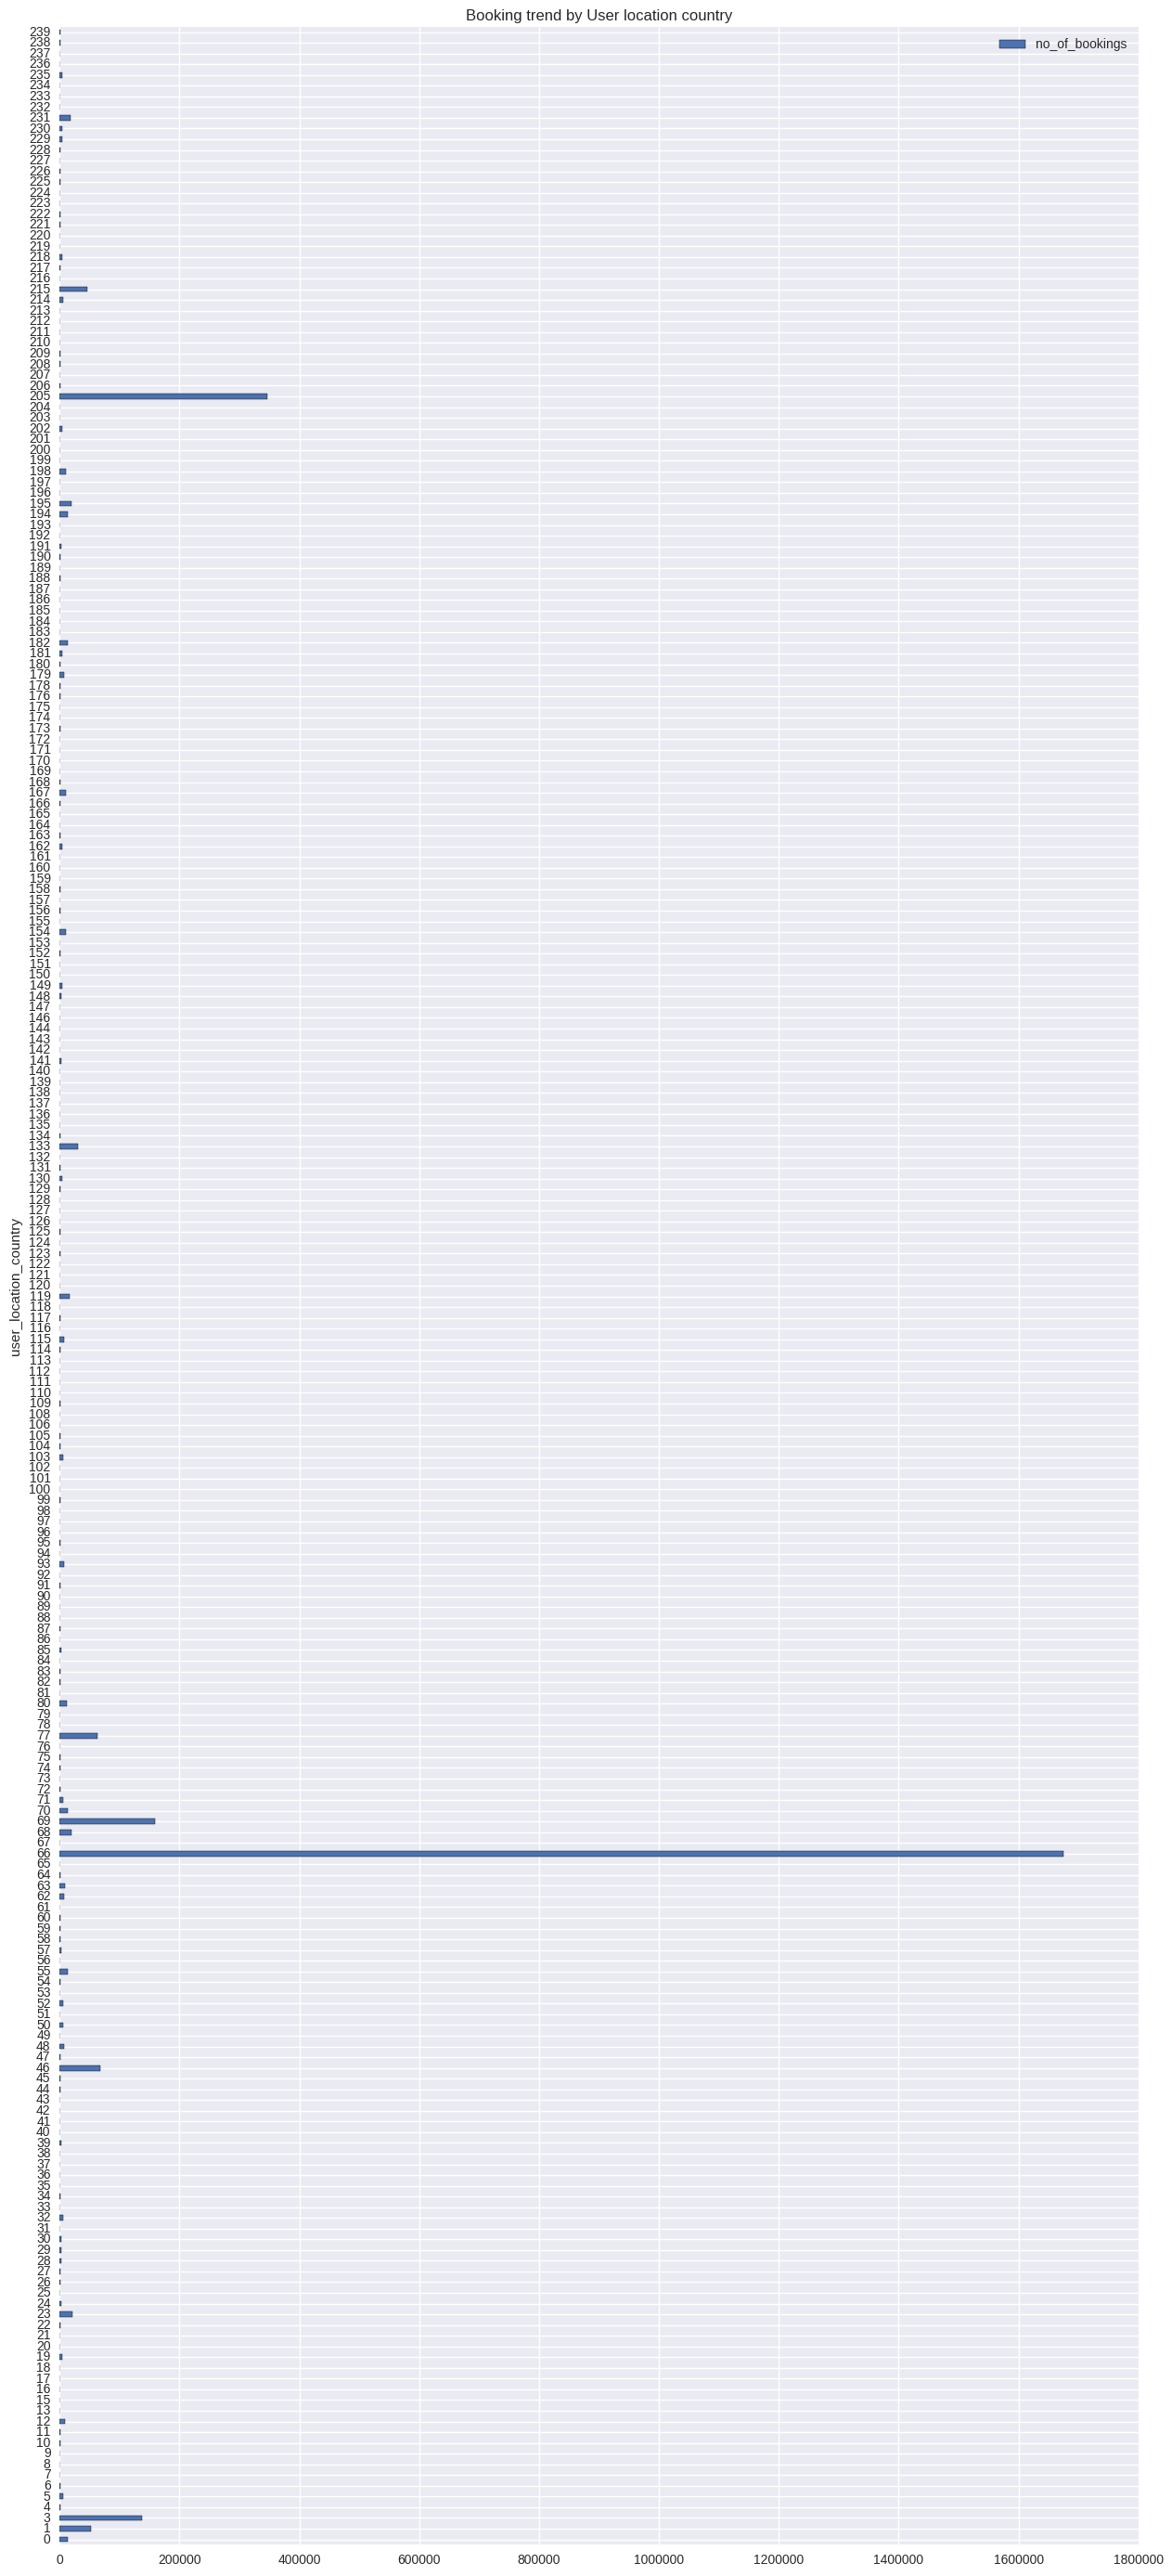

In [34]:
# Booking Trend by User_location_country

df1 = set1.groupby('user_location_country').agg(['count'])
df1.columns = ['no_of_bookings']
df1.plot(kind = 'barh', title='Booking trend by User location country', figsize=(15, 35))

### Most Popular Hotel_Country

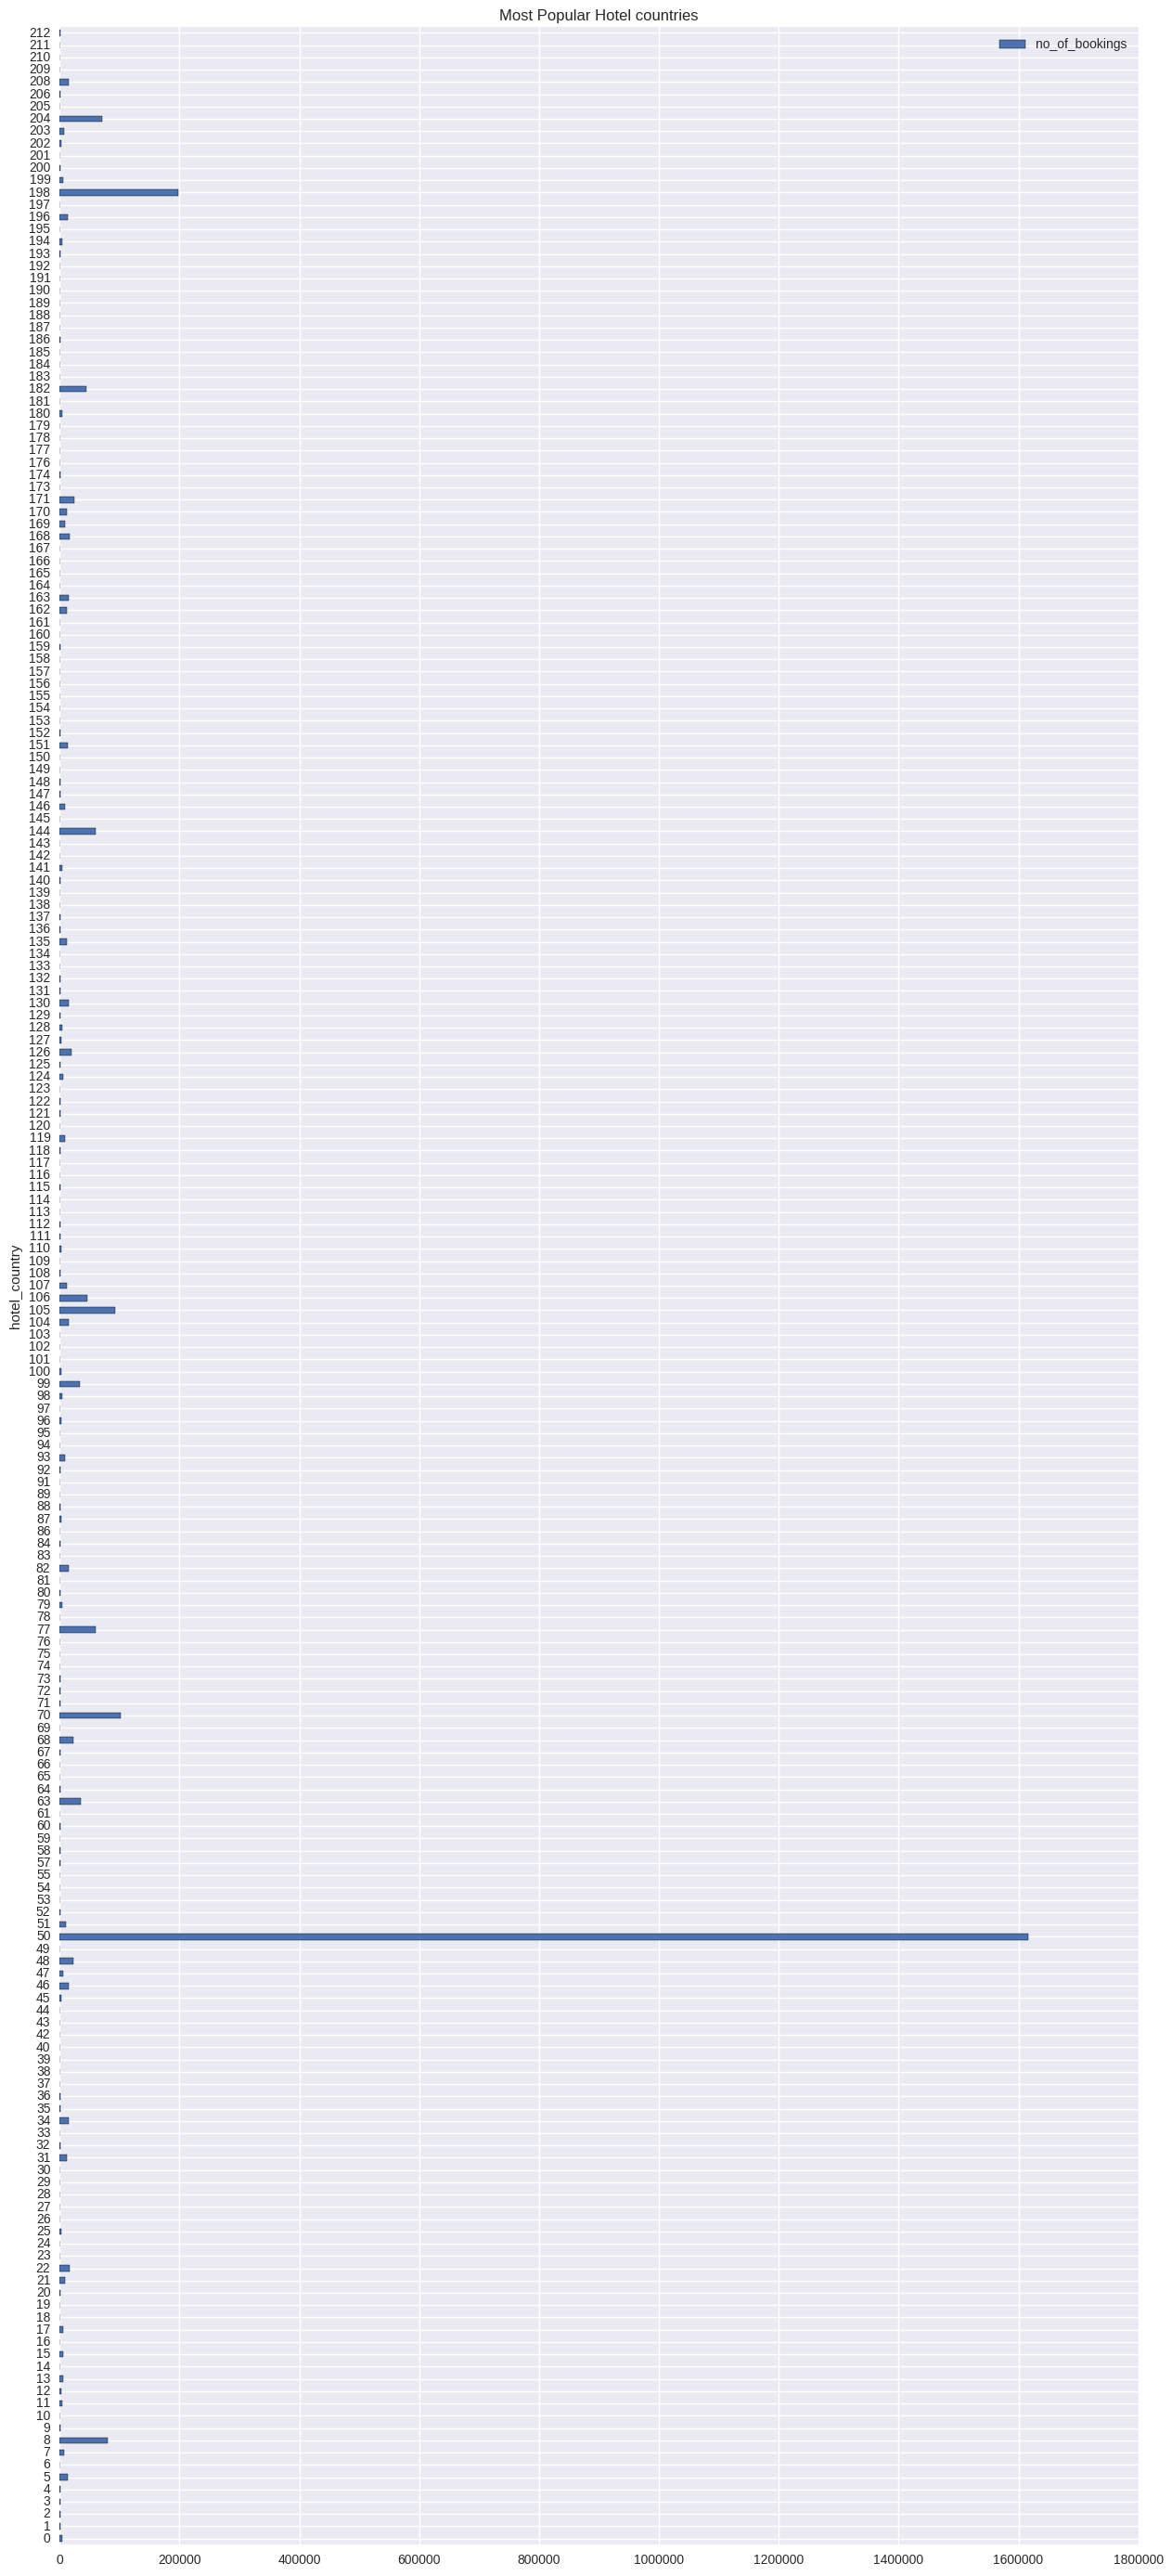

In [38]:
# Most popular Hotel_country
set1 = train1[['hotel_country','is_booking']]
df1 = set1.groupby('hotel_country').agg(['count'])
df1.columns = ['no_of_bookings']
df1.plot(kind = 'barh', title='Most Popular Hotel countries', figsize=(15,35))

In [39]:
### How Many Hotel_Countries We have in our training Set
df1.shape

(205, 1)

In [42]:
set1 = train1[train1["user_location_country"] == train1["hotel_country"]]

In [43]:
## We have 4904 users who booked/clicked the hotel from the their countries
set1.shape

(4904, 28)

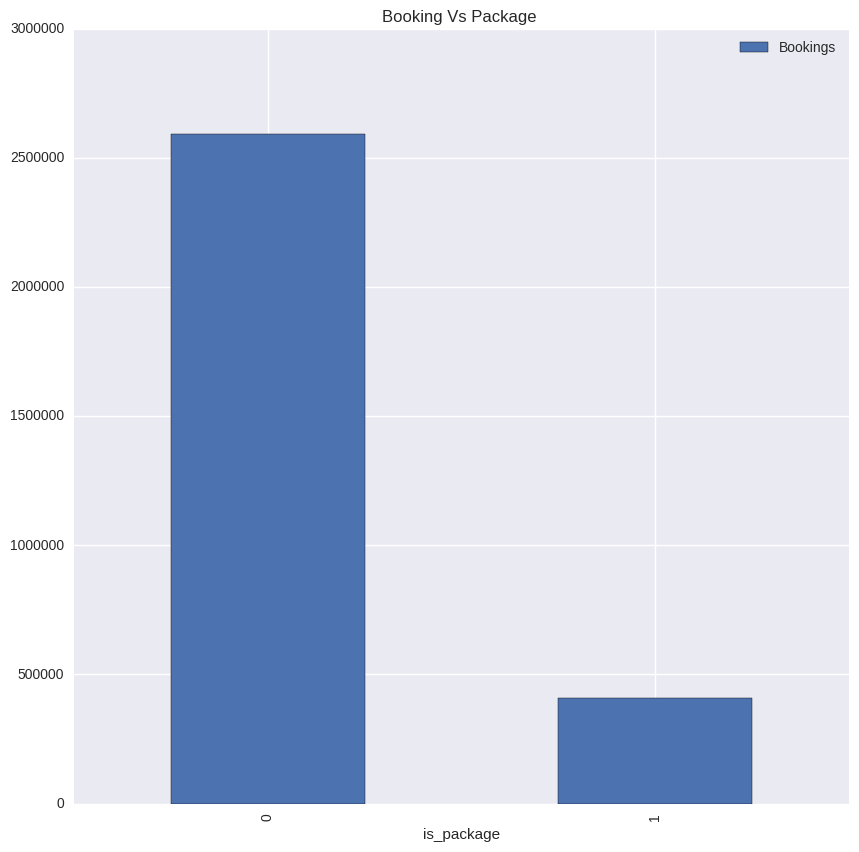

In [50]:
# Does having the package affect the booking
set1 = train1[['is_package','is_booking']]
df1 = set1.groupby('is_package').agg(['sum'])
df1.columns = ['Bookings']
df1.plot(kind = 'bar', title='Booking Vs Package ', figsize=(10,10))

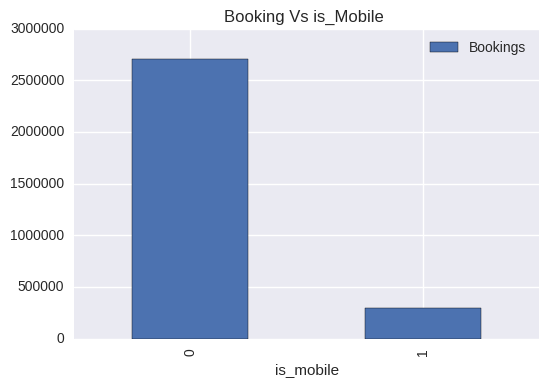

In [52]:
## How Booking event related to the Mobility of user
set1 = train1[['is_mobile','is_booking']]
df1 = set1.groupby('is_mobile').agg(['sum'])
df1.columns = ['Bookings']
df1.plot(kind = 'bar', title='Booking Vs is_Mobile ')

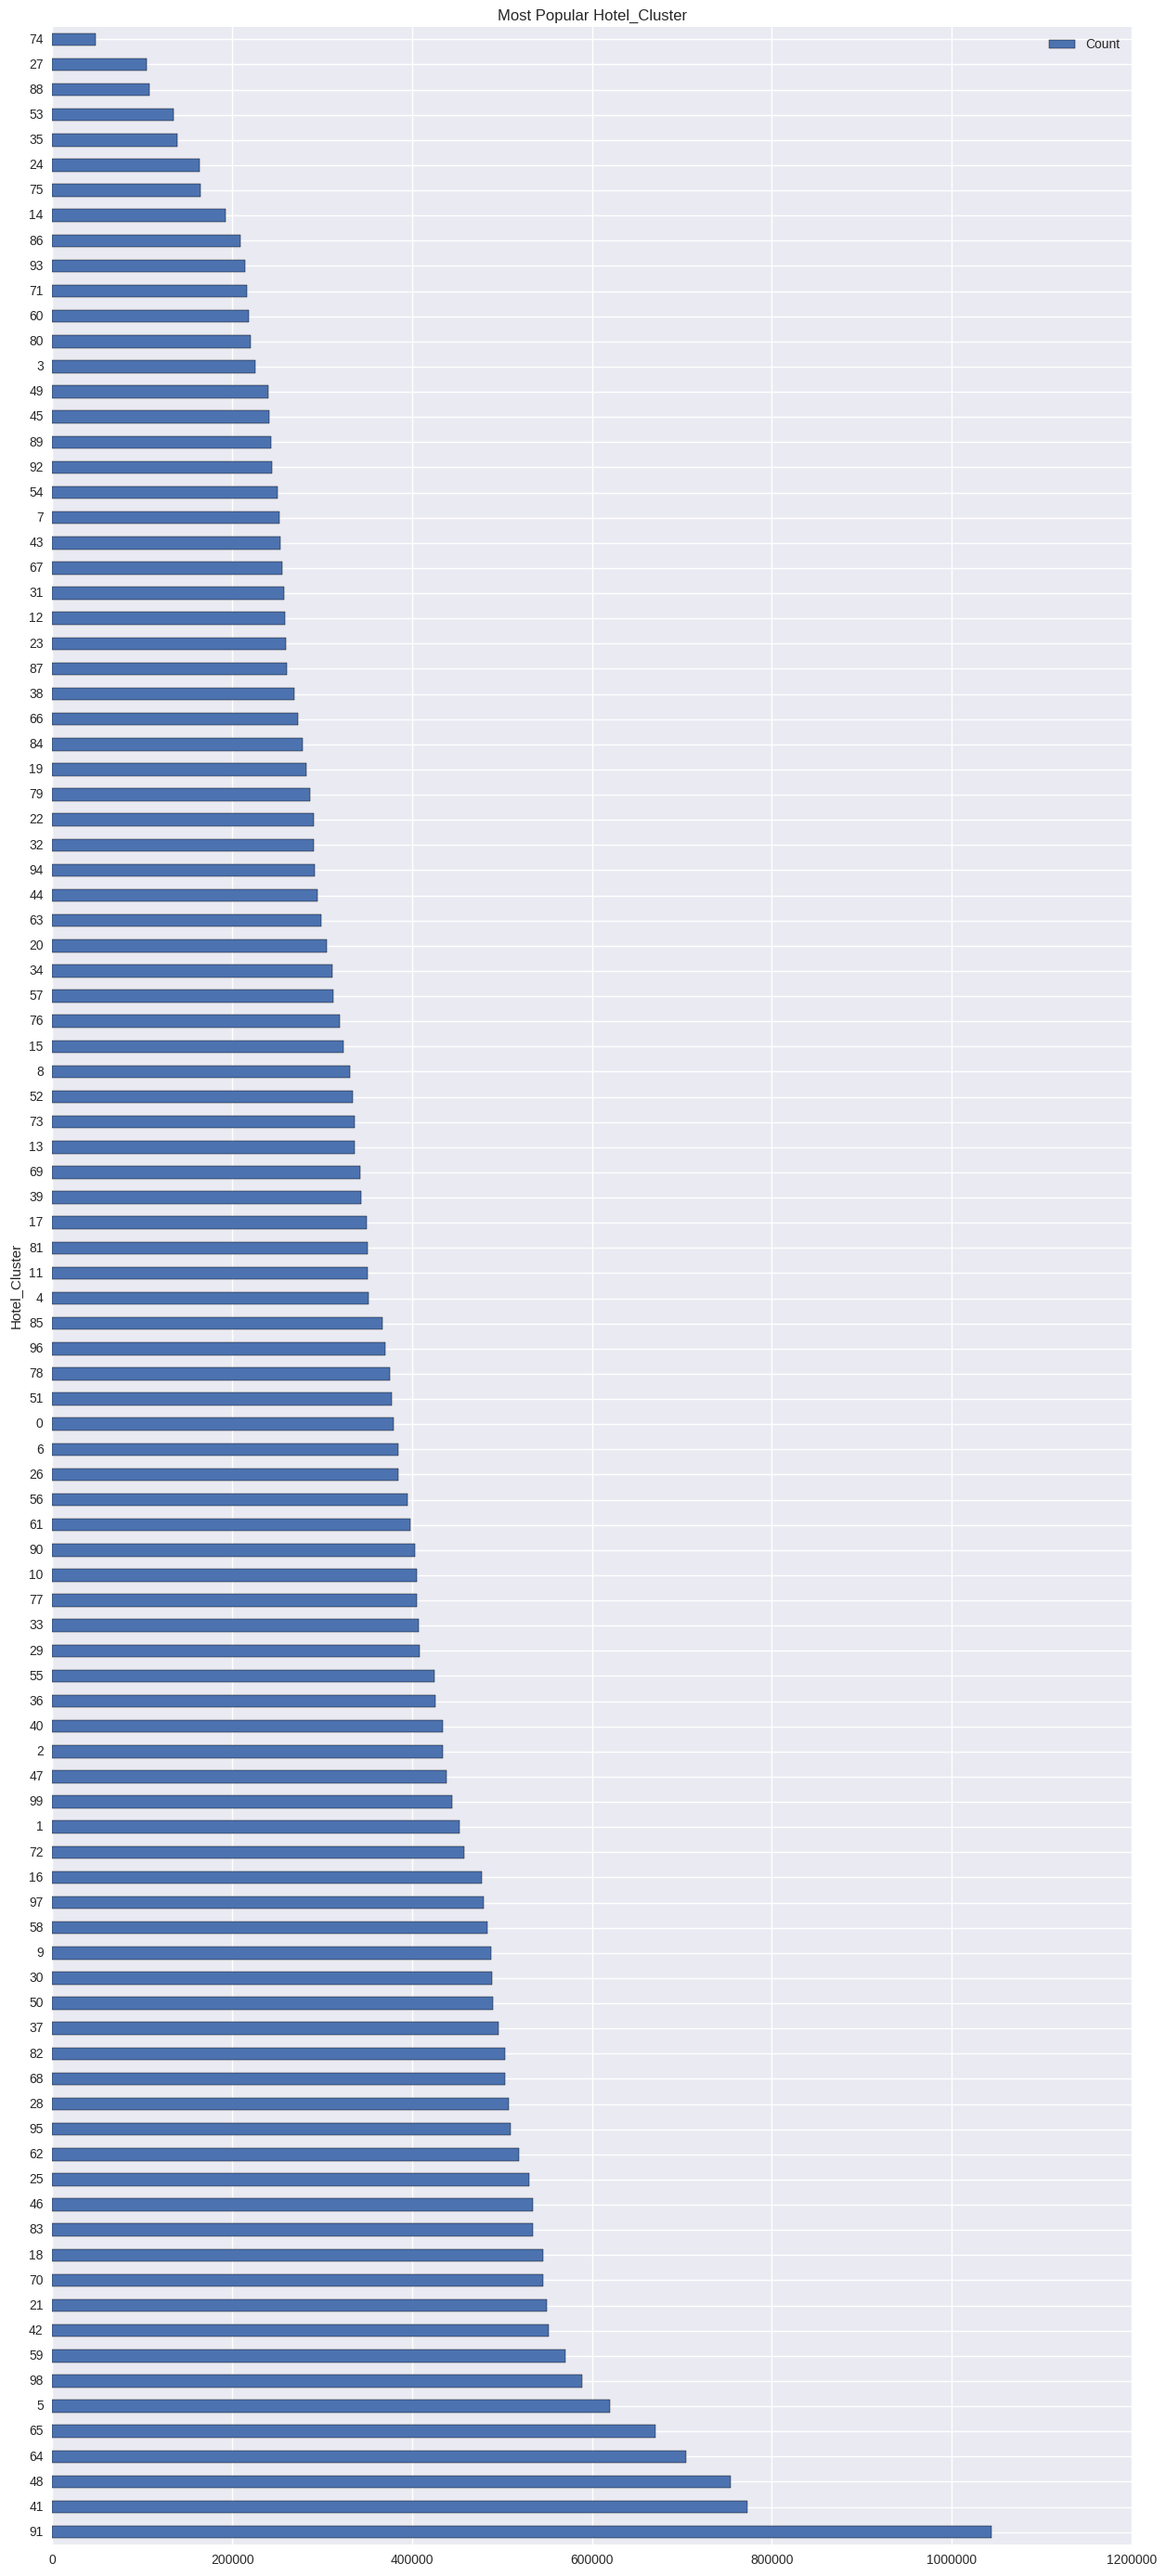

In [56]:
# Get the most popular hotel cluster based on User search Criteria

hotelCluster = pd.DataFrame(train["hotel_cluster"].value_counts())
hotelCluster.columns = (['Count'])
hotelCluster.index.name = 'Hotel_Cluster'
hotelCluster.plot(kind = 'barh', title='Most Popular Hotel_Cluster', figsize=(15,35))                    

In [57]:
## Top Five Hotel_Cluster
hotelCluster.sort_values(by='Count', ascending=True)
hotelCluster.head()

,Count
Hotel_Cluster,
91,1043720
41,772743
48,754033
64,704734
65,670960


In [62]:
# Popular hotel_country by based on search
hotelCountry = pd.DataFrame(train["hotel_country"].value_counts())
hotelCountry.columns = (['Count'])
hotelCountry.index.name = 'hotel_country'
hotelCountry.sort_values(by='Count', ascending=True)  

# Top 5 Hotel_countries
hotelCountry.head()

,Count
hotel_country,
50,18015006
8,1914010
198,1762641
105,1350403
70,1199342


In [64]:
# Top 5 User countries
userCountry = pd.DataFrame(train["user_location_country"].value_counts())
userCountry.columns = (['Count'])
userCountry.index.name = 'user_location_country'
userCountry.sort_values(by='Count', ascending=True)   
userCountry.head()

,Count
user_location_country,
66,20346844
205,4188283
3,2212572
69,1931466
77,948722


In [73]:
# Frequency of Hotel_cluster based on the user_location_city
set2 = train[['user_location_city', 'hotel_cluster']]
agg = set2.groupby(['user_location_city']).agg(['count'])
agg.columns = (['Hotel_Cluster_Count'])
agg.shape

(50447, 1)

In [74]:
agg.sort_values('Hotel_Cluster_Count')
agg.head(10)

,Hotel_Cluster_Count
user_location_city,
0,1090
1,680
3,6842
4,11
5,31
6,1
7,9
8,143
9,34


In [78]:
set2 = train[['hotel_country', 'hotel_cluster']]
agg = set2.groupby(['hotel_country']).agg(['count'])
agg.columns = (['Hotel_Cluster_Count'])
agg.head(10)


,Hotel_Cluster_Count
hotel_country,
0,62111
1,19375
2,4839
3,7817
4,11610
5,325064
6,497
7,90774
8,1914010


In [84]:
# One way tables

train_tab = pd.crosstab(index=train["hotel_cluster"], columns="count")
train_tab.head()

col_0,count
hotel_cluster,
0,379893
1,452694
2,434519
3,225250
4,351849


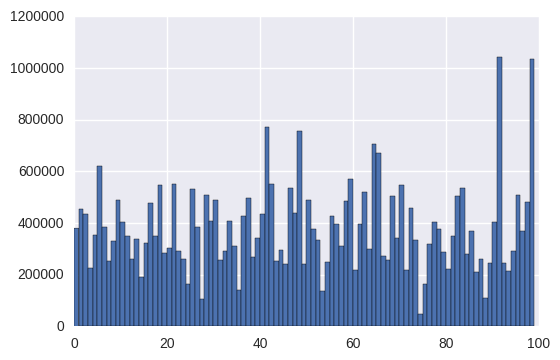

In [83]:
hotelCluster = train["hotel_cluster"]
plt.hist(hotelCluster , bins=np.arange(hotelCluster .min(), hotelCluster .max()+1))
plt.show()

### Two Way Contigency table between 'is_booking' and 'hotel_cluster'

In [108]:

cluster_booking = pd.crosstab(index=train["is_booking"], 
                           columns=train["hotel_cluster"])
cluster_booking.index = ["clicks","booking"]

In [109]:
cluster_booking.ix[:, 0:15]
    

hotel_cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
clicks,360666,414244,389464,212837,316260,577460,339942,217721,308744,443019,373038,322759,243127,292796,177162,284748
booking,19227,38450,45055,12413,35589,42734,44449,34726,22313,45309,31726,27755,15895,43182,15137,39393


In [110]:
cluster_booking.ix[:, 16:30]

hotel_cluster,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
clicks,421192,328392,489625,250818,291619,498622,267757,243089,151861,484219,368357,102357,443038,373429,461361
booking,56676,20951,55659,32075,13200,51470,22427,16144,12266,46372,16627,2683,63978,35022,27926


In [111]:
cluster_booking.ix[:, 31:45]

hotel_cluster,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
clicks,245427,248364,369403,292235,131993,385997,455995,252953,307326,403350,722968,478482,221308,284201,223240
booking,12160,41888,38111,19390,7129,40410,40066,16293,35909,30380,49775,73123,32270,11008,18168


In [112]:
cluster_booking.ix[:, 46:60]

hotel_cluster,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
clicks,487241,394219,668656,216218,435483,346555,325771,129688,229602,389740,366257,298199,451365,503682,209708
booking,46797,44084,85377,23906,54409,30504,8381,5124,21143,35278,28374,14362,31888,66609,8211


In [113]:
cluster_booking.ix[:, 61:75]

hotel_cluster,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
clicks,370307,478280,283926,656717,649482,264038,233524,460914,323170,508681,206842,413776,320846,45890,153902
booking,27499,40529,15202,48017,21478,9467,22422,42883,18660,36891,9212,43687,14908,2465,11324


In [116]:
cluster_booking.ix[:, 76:90]

hotel_cluster,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
clicks,300402,366517,350169,265519,212426,319421,449435,500699,268005,343310,201357,254072,100592,228432,379386
booking,19374,38766,25197,21482,7792,30983,54320,33433,10259,23904,7697,6326,7192,15128,23930


In [115]:
cluster_booking.ix[:, 91:]

hotel_cluster,91,92,93,94,95,96,97,98,99
clicks,922748,237910,205320,264425,454141,353252,450276,540217,405925
booking,120972,6433,8973,27604,55125,16710,29170,48961,38962


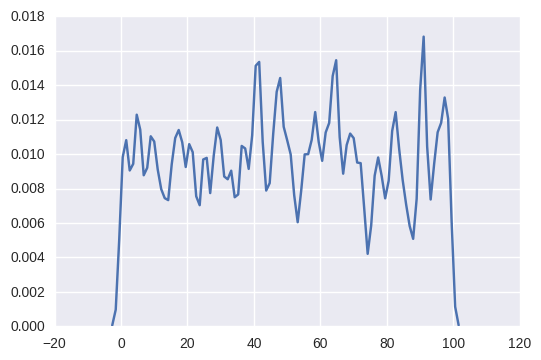

In [118]:
# Density_plot
sns.kdeplot(np.array(train["hotel_cluster"]))

### How people travel and book/click hotel cluster based on the months
### We will group user by user_location_country, user_location_region, month, srch_destination_type_id, hotel_cluster